In [35]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import pickle
IMG_SIZE = 150
X_raw = pickle.load(open("X_not_reshaped.pickle", "rb"))
y_raw = pickle.load(open("Y_not_reshaped.pickle", "rb"))

In [23]:
model = tf.keras.models.load_model("64x3-CNN.model")

In [156]:
import random
import os
NO_FILES = os.path.join(os.getcwd() + "/Data/no")
YES_FILES = os.path.join(os.getcwd() + "/Data/yes")

no_test = []
yes_test = []

for i in range(5):
    no_img_name = random.choice(os.listdir(NO_FILES))
    yes_img_name = random.choice(os.listdir(YES_FILES))
    no_img = cv2.imread(os.path.join(NO_FILES, no_img_name), cv2.IMREAD_GRAYSCALE)
    yes_img = cv2.imread(os.path.join(YES_FILES, yes_img_name), cv2.IMREAD_GRAYSCALE)
    no_test.append(cv2.resize(no_img, (IMG_SIZE, IMG_SIZE)))
    yes_test.append(cv2.resize(yes_img, (IMG_SIZE, IMG_SIZE)))

In [157]:
no_test_reshape = np.array(no_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
no_test_reshape = no_test_reshape / 255.0
yes_test_reshape = np.array(yes_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
yes_test_reshape = yes_test_reshape / 255.0

In [158]:
model = tf.keras.models.load_model("64x3-CNN.model")

In [159]:
model.predict([yes_test_reshape])

array([[1.       ],
       [0.9998373],
       [0.9999981],
       [0.9999913],
       [0.9999994]], dtype=float32)

In [160]:
val_loss, val_accuracy = model.evaluate(no_test_reshape, np.zeros(5))

1/1 [==============================] - 0s 1ms/step - loss: 0.1129 - accuracy: 1.0000


In [161]:
_, val_accuracy = model.evaluate(yes_test_reshape, np.ones(5))

1/1 [==============================] - 0s 993us/step - loss: 3.4774e-05 - accuracy: 1.0000


PREDICTION : [0.00010288] ~ NO TUMOR


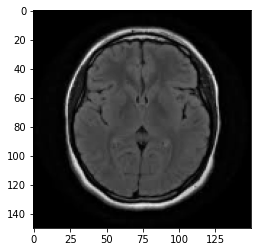

In [186]:
# Predicting No Tumor Image
plt.imshow(no_test[2], cmap = 'gray')
plt.plot()
print("PREDICTION : {} ~ NO TUMOR".format((model.predict(no_test_reshape)[2])))

PREDICTION : [1.] ~ POTENTIAL TUMOR DETECTED


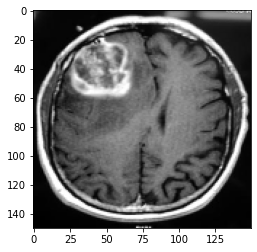

In [189]:
# Predicting a brain tumor image
plt.imshow(yes_test[0], cmap = 'gray')
plt.plot()
print("PREDICTION : {} ~ POTENTIAL TUMOR DETECTED".format((model.predict(yes_test_reshape)[0])))